# Xiao Liu
# "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [494]:
df=pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


# Data wrangling & ETL: Data cleaningg & transformation

In [496]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [497]:
df.groupby('CHILD').size()

CHILD
1     582
     3967
dtype: int64

In [498]:
df['CHILD'].describe()

count     4549
unique       2
top           
freq      3967
Name: CHILD, dtype: object

In [499]:
df = df.fillna({'CHILD': ''})
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD          0
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [500]:
df['SPORT'].median()

0.0

In [501]:
df.groupby('SPORT').size()

SPORT
0.0    4047
1.0     211
2.0      13
3.0       2
dtype: int64

In [502]:
df['SPORT'].describe()

count    4273.000000
mean        0.056869
std         0.250085
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: SPORT, dtype: float64

In [503]:
# replace null value with the median value 
df = df.fillna({'SPORT': 0.0})
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
CHILD       0
GNDR        0
OWNHOME     0
SPORT       0
COMP        0
PCTMARR     0
HOMEVAL     0
dtype: int64

# Data Understanding & visualization

In [504]:
df.groupby('Y2defect').size()

Y2defect
0    4608
1    4608
dtype: int64

In [505]:
df.groupby('Y2defect').mean()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,
0,0.385200,0.496094,0.656033,0.340929,0.550998,20.170356,6.777778,0.584418,0.024306,58.536458,109.368273
1,0.288845,0.524957,0.617405,0.241319,0.409505,19.755859,5.978299,0.394531,0.028429,57.920573,114.854167


In [506]:
df.groupby('INCOME').size()

INCOME
0     875
1    1287
2     853
3    1233
4    1557
5     763
6     704
     1944
dtype: int64

In [507]:
# basic statistics
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,0.026367,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,0.172622,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,0.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,0.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,3.000000,99.000000,600.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000030A59E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000031719630>]], dtype=object)

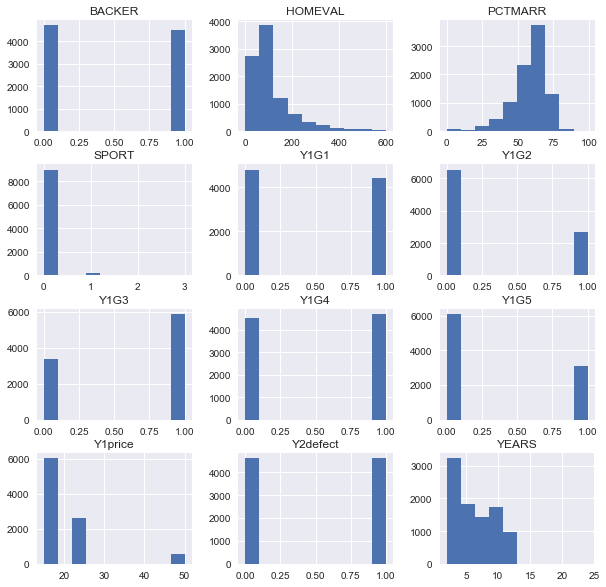

In [508]:
df.hist(figsize=(10,10))

Y2defect
0    [[Axes(0.125,0.725918;0.215278x0.154082), Axes...
1    [[Axes(0.125,0.725918;0.215278x0.154082), Axes...
dtype: object

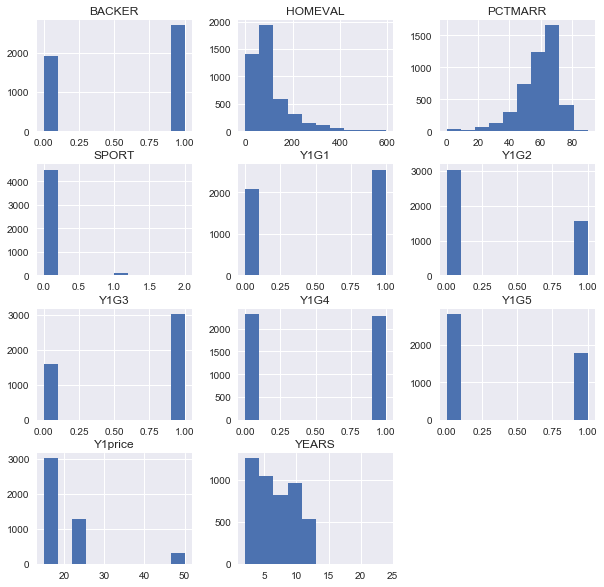

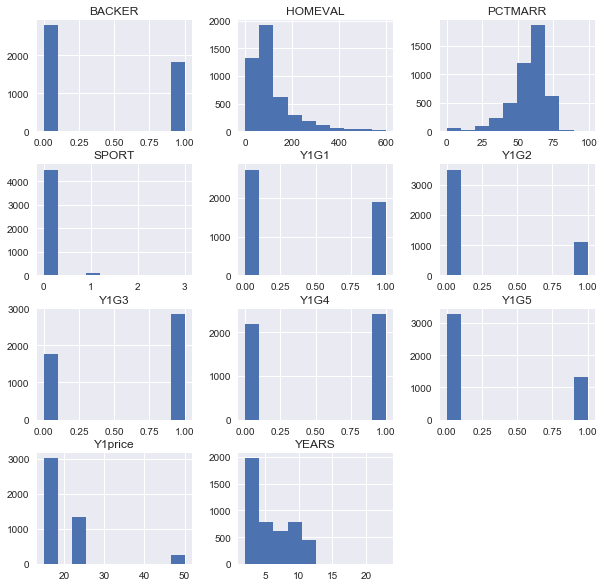

In [509]:
df.groupby('Y2defect').hist(figsize=(10,10))

Y2defect
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: YEARS, dtype: object

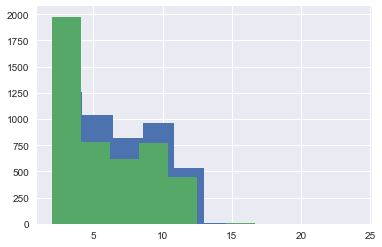

In [510]:
df.groupby('Y2defect').YEARS.hist(alpha=0.9)

Y2defect
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: BACKER, dtype: object

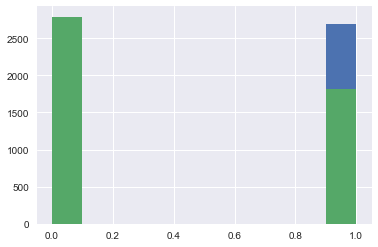

In [511]:
df.groupby('Y2defect').BACKER.hist(alpha=0.9)

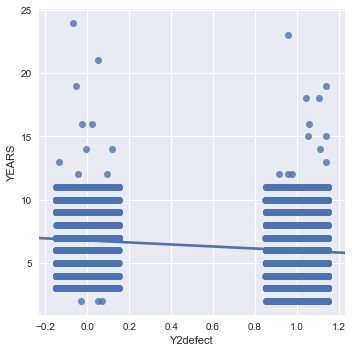

In [512]:
sns.lmplot("Y2defect", "YEARS", df, x_jitter=.15)

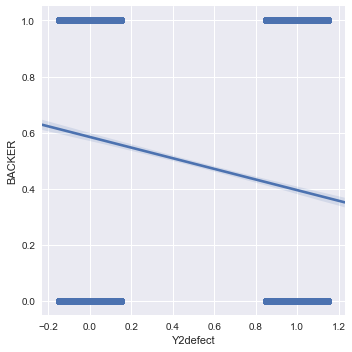

In [513]:
sns.lmplot("Y2defect", "BACKER", df, x_jitter=.15)

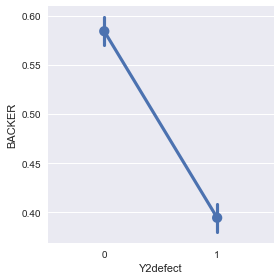

In [514]:
sns.factorplot("Y2defect", "BACKER", data=df)

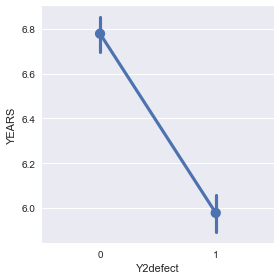

In [515]:
sns.factorplot("Y2defect", "YEARS", data=df)

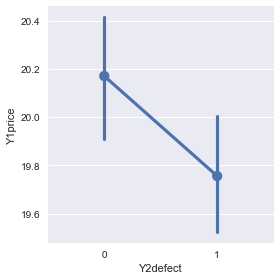

In [516]:
sns.factorplot("Y2defect", "Y1price", data=df)

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       9216 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       9216 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [518]:
df['INCOME'].unique()

array([4, u' ', 2, 0, 1, 5, 3, 6], dtype=object)

In [519]:
INCOME_dummies = pd.get_dummies(df['INCOME'], prefix='INCOME')
df = pd.concat([df, INCOME_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,PCTMARR,HOMEVAL,INCOME_0,INCOME_1,INCOME_2,INCOME_3,INCOME_4,INCOME_5,INCOME_6,INCOME_
0,580V74KT,0,0,0,1,1,1,15,8,1,...,77,203,0,0,0,0,1,0,0,0


In [520]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 27 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       9216 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       9216 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
INCOME_0    9216 non-null uint8
INCOME_1    9216 non-null uint8
INCOME_2    9216 non-null uint8
INCOME_3    9216 non-null uint8
INCOME_4    9216 non-null uint8
INCOME_5    9216 non-null uint8
INCOME_6    9216 non-null uint8
INCOME_     9216 non-null uint8
dtypes: float64(1), 

In [521]:
df['AGE'].unique()

array([94, u' ', 67, 62, 89, 77, 76, 54, 82, 48, 91, 61, 81, 68, 42, 70,
       40, 55, 58, 29, 72, 71, 60, 51, 49, 44, 35, 73, 38, 75, 69, 74, 26,
       41, 59, 34, 64, 66, 39, 56, 79, 57, 47, 85, 23, 31, 78, 80, 50, 65,
       32, 33, 46, 52, 27, 45, 53, 84, 83, 28, 90, 87, 93, 30, 21, 43, 88,
       36, 86, 37, 92, 95, 63, 97, 96, 25, 19, 22, 14, 12, 24, 20], dtype=object)

In [522]:
df['AGE'] = df['AGE'].astype('category')


In [523]:
df['AGE_cat'] = df['AGE'].cat.codes
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,HOMEVAL,INCOME_0,INCOME_1,INCOME_2,INCOME_3,INCOME_4,INCOME_5,INCOME_6,INCOME_,AGE_cat
0,580V74KT,0,0,0,1,1,1,15,8,1,...,203,0,0,0,0,1,0,0,0,77
1,298S54OK,1,0,0,1,0,1,15,3,1,...,68,0,0,0,0,0,0,0,1,81
2,268D25AO,1,1,0,0,0,1,15,11,1,...,38,0,0,1,0,0,0,0,0,50
3,312Q12WV,1,1,0,1,0,1,15,4,0,...,68,0,0,0,0,1,0,0,0,45
4,420R23VB,0,0,0,1,0,0,15,5,0,...,194,0,0,0,0,1,0,0,0,72


In [524]:
df['CHILD'].unique()

array(['', u' ', 1], dtype=object)

In [525]:
CHILD_dummies = pd.get_dummies(df['CHILD'], prefix='CHILD')
df = pd.concat([df, CHILD_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,INCOME_2,INCOME_3,INCOME_4,INCOME_5,INCOME_6,INCOME_,AGE_cat,CHILD_1,CHILD_,CHILD_
0,580V74KT,0,0,0,1,1,1,15,8,1,...,0,0,1,0,0,0,77,0,1,0


In [526]:
df['GNDR'].unique()

array([0, 1, u' '], dtype=object)

In [527]:
GNDR_dummies = pd.get_dummies(df['GNDR'], prefix='GNDR')
df = pd.concat([df, GNDR_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,INCOME_5,INCOME_6,INCOME_,AGE_cat,CHILD_1,CHILD_,CHILD_,GNDR_0,GNDR_1,GNDR_
0,580V74KT,0,0,0,1,1,1,15,8,1,...,0,0,0,77,0,1,0,1,0,0


In [528]:
df['OWNHOME'].unique()

array([1, 0, u' '], dtype=object)

In [529]:
OWNHOME_dummies = pd.get_dummies(df['OWNHOME'], prefix='OWNHOME')
df = pd.concat([df, OWNHOME_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,AGE_cat,CHILD_1,CHILD_,CHILD_,GNDR_0,GNDR_1,GNDR_,OWNHOME_0,OWNHOME_1,OWNHOME_
0,580V74KT,0,0,0,1,1,1,15,8,1,...,77,0,1,0,1,0,0,0,1,0


In [530]:
df['COMP'].unique()

array([u' ', 1], dtype=object)

In [531]:
COMP_dummies = pd.get_dummies(df['COMP'], prefix='COMP')
df = pd.concat([df, COMP_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,CHILD_,CHILD_,GNDR_0,GNDR_1,GNDR_,OWNHOME_0,OWNHOME_1,OWNHOME_,COMP_1,COMP_
0,580V74KT,0,0,0,1,1,1,15,8,1,...,1,0,1,0,0,0,1,0,0,1


In [532]:
df['BACKER'].unique()

array([1, 0], dtype=int64)

In [533]:
BACKER_dummies = pd.get_dummies(df['BACKER'], prefix='BACKER')
df = pd.concat([df, BACKER_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,GNDR_0,GNDR_1,GNDR_,OWNHOME_0,OWNHOME_1,OWNHOME_,COMP_1,COMP_,BACKER_0,BACKER_1
0,580V74KT,0,0,0,1,1,1,15,8,1,...,1,0,0,0,1,0,0,1,0,1


In [534]:
df['SPORT'].unique()

array([ 0.,  1.,  2.,  3.])

In [535]:
SPORT_dummies = pd.get_dummies(df['SPORT'], prefix='SPORT')
df = pd.concat([df, SPORT_dummies], axis=1)
df.head(1)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,...,OWNHOME_1,OWNHOME_,COMP_1,COMP_,BACKER_0,BACKER_1,SPORT_0.0,SPORT_1.0,SPORT_2.0,SPORT_3.0
0,580V74KT,0,0,0,1,1,1,15,8,1,...,1,0,0,1,0,1,1,0,0,0


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 45 columns):
FAKEID       9216 non-null object
Y2defect     9216 non-null int64
Y1G5         9216 non-null int64
Y1G4         9216 non-null int64
Y1G3         9216 non-null int64
Y1G2         9216 non-null int64
Y1G1         9216 non-null int64
Y1price      9216 non-null int64
YEARS        9216 non-null int64
BACKER       9216 non-null int64
AGE          9216 non-null category
INCOME       9216 non-null object
CHILD        9216 non-null object
GNDR         9216 non-null object
OWNHOME      9216 non-null object
SPORT        9216 non-null float64
COMP         9216 non-null object
PCTMARR      9216 non-null int64
HOMEVAL      9216 non-null int64
INCOME_0     9216 non-null uint8
INCOME_1     9216 non-null uint8
INCOME_2     9216 non-null uint8
INCOME_3     9216 non-null uint8
INCOME_4     9216 non-null uint8
INCOME_5     9216 non-null uint8
INCOME_6     9216 non-null uint8
INCOME_      9216 non-nu

# Correlation Analysis(EAD)

In [537]:
# correlation analysis
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,...,OWNHOME_1,OWNHOME_,COMP_1,COMP_,BACKER_0,BACKER_1,SPORT_0.0,SPORT_1.0,SPORT_2.0,SPORT_3.0
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,0.011944,...,-0.017937,0.003423,0.019113,-0.019113,0.189929,-0.189929,-0.008419,0.005078,0.008673,0.014733
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.005457,...,0.005646,0.014644,-0.025772,0.025772,-0.045319,0.045319,-0.007173,0.009037,-0.008448,0.005080
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,0.017533,...,0.018561,0.021836,0.010344,-0.010344,0.090743,-0.090743,-0.016310,0.014918,0.002100,0.014426
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.002252,...,-0.013655,-0.013576,0.017739,-0.017739,-0.005308,0.005308,-0.000148,0.002492,-0.007678,-0.004188
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.003123,...,-0.007112,0.006400,-0.032698,0.032698,-0.276530,0.276530,-0.006495,0.008900,-0.004993,-0.009442
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.004151,...,-0.001132,-0.001066,-0.017788,0.017788,-0.256153,0.256153,-0.009076,0.014037,-0.018768,0.000582
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,0.010261,...,-0.006664,-0.010187,0.012499,-0.012499,0.090287,-0.090287,-0.011004,0.010922,0.001796,0.000062
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,-0.022063,...,-0.020362,0.020732,-0.076235,0.076235,-0.533836,0.533836,0.019881,-0.015592,-0.020035,0.000625
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,-0.020048,...,-0.026875,0.023458,-0.045798,0.045798,-1.000000,1.000000,0.020520,-0.019271,-0.007884,0.000310
SPORT,0.011944,0.005457,0.017533,-0.002252,0.003123,0.004151,0.010261,-0.022063,-0.020048,1.000000,...,0.087769,-0.027009,0.033008,-0.033008,0.020048,-0.020048,-0.963421,0.863418,0.429734,0.253808


In [538]:
corr = pd.DataFrame(df.corr()['Y2defect'].drop('Y2defect'))
corr.sort_values(['Y2defect'], ascending = False)

,Y2defect
BACKER_0,0.189929
HOMEVAL,0.029722
Y1G4,0.028869
COMP_1,0.019113
OWNHOME_0,0.018063
INCOME_,0.017022
SPORT_3.0,0.014733
SPORT,0.011944
SPORT_2.0,0.008673
INCOME_6,0.008170


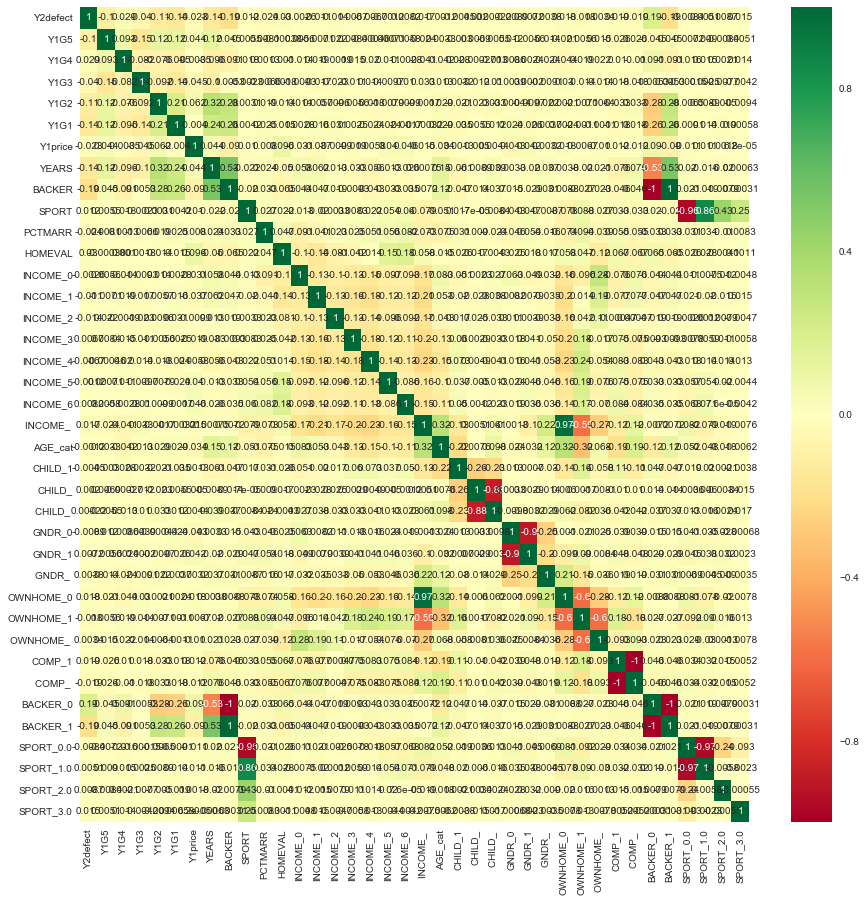

In [238]:
# heatmap for correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")

# Statistical Hypothesis Testing

In [239]:
import scipy.stats as stats
print stats.normaltest(df['BACKER'])
print stats.normaltest(df['HOMEVAL'])
print stats.normaltest(df['YEARS'])
print stats.normaltest(df['SPORT'])

NormaltestResult(statistic=2.7257352313518433, pvalue=0.25592582676714543)
NormaltestResult(statistic=4240.4135857019837, pvalue=0.0)
NormaltestResult(statistic=1024.5429883471536, pvalue=3.3366975624624527e-223)
NormaltestResult(statistic=11844.758947597291, pvalue=0.0)


(array([  1.59357244e-01,   8.98634785e-02,   7.07267992e-02,
          8.54738794e-02,   4.82855903e-02,   3.45249369e-04,
          1.47964015e-04,   1.97285354e-04,   4.93213384e-05,
          9.86426768e-05]),
 array([  2. ,   4.2,   6.4,   8.6,  10.8,  13. ,  15.2,  17.4,  19.6,
         21.8,  24. ]),
 <a list of 10 Patch objects>)

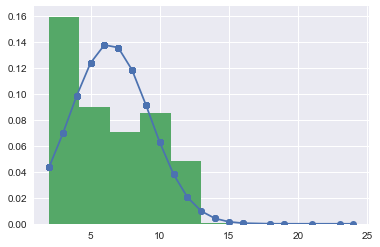

In [240]:
# an illustration of normal distribution

h = sorted(df['YEARS'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data

In [241]:
df.groupby('Y2defect').mean()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,PCTMARR,...,OWNHOME_1,OWNHOME_,COMP_1,COMP_,BACKER_0,BACKER_1,SPORT_0.0,SPORT_1.0,SPORT_2.0,SPORT_3.0
Y2defect,,,,,,,,,,,,,,,,,,,,,
0,0.385200,0.496094,0.656033,0.340929,0.550998,20.170356,6.777778,0.584418,0.024306,58.536458,...,0.571615,0.215495,0.103516,0.896484,0.415582,0.584418,0.976780,0.022135,0.001085,0.000000
1,0.288845,0.524957,0.617405,0.241319,0.409505,19.755859,5.978299,0.394531,0.028429,57.920573,...,0.553819,0.218316,0.115451,0.884549,0.605469,0.394531,0.974175,0.023655,0.001736,0.000434


In [242]:
yes = df[df['Y2defect'] == 1]['YEARS']
no = df[df['Y2defect'] ==  0]['YEARS']
stats.ttest_ind(yes, no)

Ttest_indResult(statistic=-13.483160293525216, pvalue=4.8084106249489604e-41)

In [243]:
two_sample = stats.ttest_ind(yes, no)
print "The chi-square statistic is %.3f and the p-value is %.3f." % two_sample

The chi-square statistic is -13.483 and the p-value is 0.000.


# The lower the number of years as a season ticket holder, the higher ticket holders that did not renew for year 2

In [244]:
yes = df[df['Y2defect'] == 1]['BACKER']
no = df[df['Y2defect'] ==  0]['BACKER']
stats.ttest_ind(yes, no)

Ttest_indResult(statistic=-18.56922946458695, pvalue=1.3520712382657136e-75)

In [245]:
two_sample = stats.ttest_ind(yes, no)
print "The chi-square statistic is %.3f and the p-value is %.3f." % two_sample

The chi-square statistic is -18.569 and the p-value is 0.000.


In [246]:
yes = df[df['Y2defect'] == 1]['SPORT']
no = df[df['Y2defect'] ==  0]['SPORT']
stats.ttest_ind(yes, no)

Ttest_indResult(statistic=1.1465497359071382, pvalue=0.25159753377181848)

In [247]:
two_sample = stats.ttest_ind(yes, no)
print "The chi-square statistic is %.3f and the p-value is %.3f." % two_sample

The chi-square statistic is 1.147 and the p-value is 0.252.


# SPORT has not impact

In [248]:
yes = df[df['Y2defect'] == 1]['HOMEVAL']
no = df[df['Y2defect'] ==  0]['HOMEVAL']
stats.ttest_ind(yes, no)

Ttest_indResult(statistic=2.8542492339219598, pvalue=0.0043234920444823396)

In [249]:
two_sample = stats.ttest_ind(yes, no)
print "The chi-square statistic is %.3f and the p-value is %.3f." % two_sample

The chi-square statistic is 2.854 and the p-value is 0.004.


# Classification model building

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 45 columns):
FAKEID       9216 non-null object
Y2defect     9216 non-null int64
Y1G5         9216 non-null int64
Y1G4         9216 non-null int64
Y1G3         9216 non-null int64
Y1G2         9216 non-null int64
Y1G1         9216 non-null int64
Y1price      9216 non-null int64
YEARS        9216 non-null int64
BACKER       9216 non-null int64
AGE          9216 non-null category
INCOME       9216 non-null object
CHILD        9216 non-null object
GNDR         9216 non-null object
OWNHOME      9216 non-null object
SPORT        9216 non-null float64
COMP         9216 non-null object
PCTMARR      9216 non-null int64
HOMEVAL      9216 non-null int64
INCOME_0     9216 non-null uint8
INCOME_1     9216 non-null uint8
INCOME_2     9216 non-null uint8
INCOME_3     9216 non-null uint8
INCOME_4     9216 non-null uint8
INCOME_5     9216 non-null uint8
INCOME_6     9216 non-null uint8
INCOME_      9216 non-nu

# Decision tree model building, validation, evaluation

In [540]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import scikitplot as skplt

In [604]:
#set x, y value
y = df['Y2defect']
X = df.drop([ 'FAKEID','AGE', 'INCOME','CHILD','GNDR','OWNHOME','COMP','Y2defect','BACKER','SPORT'], axis=1)
X = df[['Y1G5', 'Y1G4','Y1G3', 'Y1G2','Y1G1', 'Y1price','YEARS', 'PCTMARR', 'HOMEVAL','AGE_cat','INCOME_0', 'INCOME_1','INCOME_2', 'INCOME_3','INCOME_4','INCOME_5', 'INCOME_6', 'CHILD_1','CHILD_', 'CHILD_','GNDR_0', 'GNDR_1','OWNHOME_0','OWNHOME_1','COMP_1','BACKER_0', 'BACKER_1','SPORT_0.0', 'SPORT_1.0','SPORT_2.0', 'SPORT_3.0']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 45 columns):
FAKEID       9216 non-null object
Y2defect     9216 non-null int64
Y1G5         9216 non-null int64
Y1G4         9216 non-null int64
Y1G3         9216 non-null int64
Y1G2         9216 non-null int64
Y1G1         9216 non-null int64
Y1price      9216 non-null int64
YEARS        9216 non-null int64
BACKER       9216 non-null int64
AGE          9216 non-null category
INCOME       9216 non-null object
CHILD        9216 non-null object
GNDR         9216 non-null object
OWNHOME      9216 non-null object
SPORT        9216 non-null float64
COMP         9216 non-null object
PCTMARR      9216 non-null int64
HOMEVAL      9216 non-null int64
INCOME_0     9216 non-null uint8
INCOME_1     9216 non-null uint8
INCOME_2     9216 non-null uint8
INCOME_3     9216 non-null uint8
INCOME_4     9216 non-null uint8
INCOME_5     9216 non-null uint8
INCOME_6     9216 non-null uint8
INCOME_      9216 non-nu

In [605]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 31 columns):
Y1G5         9216 non-null int64
Y1G4         9216 non-null int64
Y1G3         9216 non-null int64
Y1G2         9216 non-null int64
Y1G1         9216 non-null int64
Y1price      9216 non-null int64
YEARS        9216 non-null int64
PCTMARR      9216 non-null int64
HOMEVAL      9216 non-null int64
AGE_cat      9216 non-null int8
INCOME_0     9216 non-null uint8
INCOME_1     9216 non-null uint8
INCOME_2     9216 non-null uint8
INCOME_3     9216 non-null uint8
INCOME_4     9216 non-null uint8
INCOME_5     9216 non-null uint8
INCOME_6     9216 non-null uint8
CHILD_1      9216 non-null uint8
CHILD_       9216 non-null uint8
CHILD_       9216 non-null uint8
GNDR_0       9216 non-null uint8
GNDR_1       9216 non-null uint8
OWNHOME_0    9216 non-null uint8
OWNHOME_1    9216 non-null uint8
COMP_1       9216 non-null uint8
BACKER_0     9216 non-null uint8
BACKER_1     9216 non-null uint8
SPO

In [606]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [607]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the y value generated by your model
# If they are same, we can say your model is accurate.

0.555153707052
--------------------------------------------------------
[[764 599]
 [631 771]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.56      0.55      1363
          1       0.56      0.55      0.56      1402

avg / total       0.56      0.56      0.56      2765

--------------------------------------------------------
0.555228459919


# Visualizing and embedding decision tree

In [608]:
tree.export_graphviz(dt, out_file='data/finalproject_decisiontree.dot', feature_names=X.columns)

In [609]:
# Build a decision model with max_depth 3 and min_samples_leaf 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
dt_simple.fit(X_train, y_train)
print metrics.accuracy_score(y_test, dt_simple.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_simple.predict(X_test)) 
print "--------------------------------------------------------"

0.597830018083
--------------------------------------------------------
[[1078  285]
 [ 827  575]]
--------------------------------------------------------


In [610]:
tree.export_graphviz(dt_simple, out_file='data/FP_simple.dot', feature_names=X.columns)

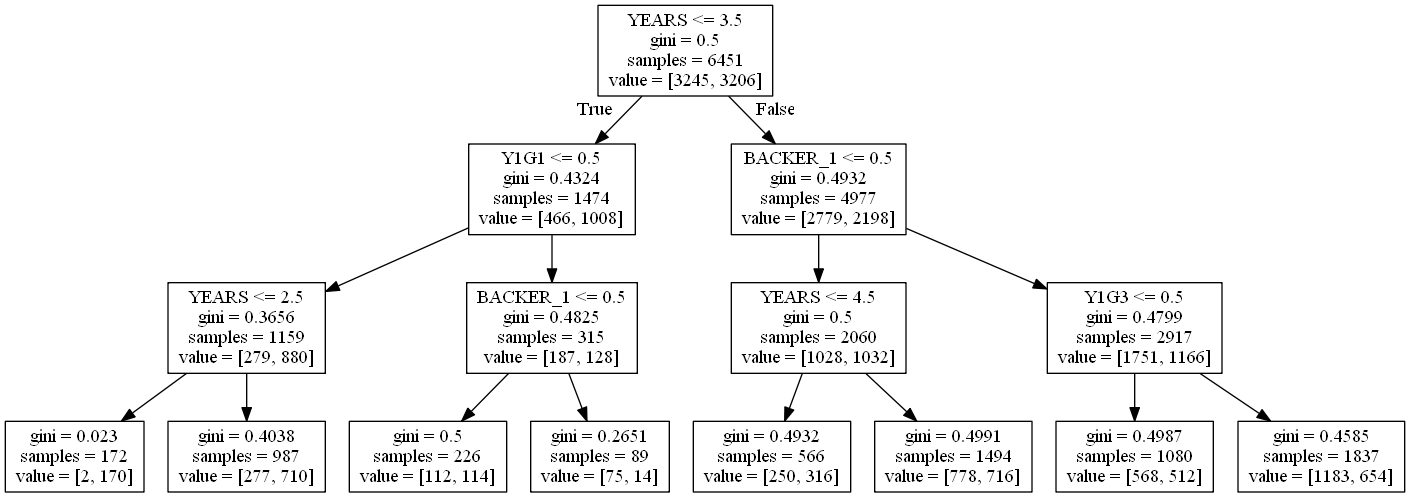

In [611]:
from IPython.display import Image
Image("data/FP_simple.png")

# Model Deployement: Make Predictions on the new dataset (scoring dataset)

In [612]:
score = pd.read_excel("data/validation_dataset.xlsx")
score.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [613]:
score.groupby('CHILD').size()

CHILD
1     601
     4209
dtype: int64

In [614]:
score = score.fillna({'CHILD': ''})
score.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME         0
CHILD          0
GNDR           0
OWNHOME        0
SPORT       5362
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [615]:
score = score.fillna({'SPORT': 0.0})
score.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE         2487
INCOME         0
CHILD          0
GNDR           0
OWNHOME        0
SPORT          0
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [616]:
score = score.fillna({'AGE': 70.0})
score.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD          0
GNDR           0
OWNHOME        0
SPORT          0
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [617]:
score['AGE'] = score['AGE'].astype('category')

In [618]:
score['AGE_cat'] = score_new['AGE'].cat.codes
score.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,AGE_cat
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,,0,1,0.0,,66,64,31
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128,66
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,70.0,,,0,0,0.0,1,52,113,52
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,0.0,,65,81,16
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,,1,1,0.0,,65,110,41


In [619]:
INCOME_dummies = pd.get_dummies(score['INCOME'], prefix='INCOME')
score = pd.concat([score, INCOME_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,HOMEVAL,AGE_cat,INCOME_0,INCOME_1,INCOME_2,INCOME_3,INCOME_4,INCOME_5,INCOME_6,INCOME_
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,64,31,0,0,0,0,1,0,0,0


In [620]:
CHILD_dummies = pd.get_dummies(score['CHILD'], prefix='CHILD')
score = pd.concat([score, CHILD_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,INCOME_1,INCOME_2,INCOME_3,INCOME_4,INCOME_5,INCOME_6,INCOME_,CHILD_1,CHILD_,CHILD_
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,0,0,0,1,0,0,0,0,1,0


In [621]:
GNDR_dummies = pd.get_dummies(score['GNDR'], prefix='GNDR')
score = pd.concat([score, GNDR_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,INCOME_4,INCOME_5,INCOME_6,INCOME_,CHILD_1,CHILD_,CHILD_,GNDR_0,GNDR_1,GNDR_
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,1,0,0,0,0,1,0,1,0,0


In [622]:
OWNHOME_dummies = pd.get_dummies(score['OWNHOME'], prefix='OWNHOME')
score = pd.concat([score, OWNHOME_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,INCOME_,CHILD_1,CHILD_,CHILD_,GNDR_0,GNDR_1,GNDR_,OWNHOME_0,OWNHOME_1,OWNHOME_
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,0,0,1,0,1,0,0,0,1,0


In [623]:
COMP_dummies = pd.get_dummies(score['COMP'], prefix='COMP')
score = pd.concat([score, COMP_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,CHILD_,CHILD_,GNDR_0,GNDR_1,GNDR_,OWNHOME_0,OWNHOME_1,OWNHOME_,COMP_1,COMP_
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,1,0,1,0,0,0,1,0,0,1


In [624]:
SPORT_dummies = pd.get_dummies(score['SPORT'], prefix='SPORT')
score = pd.concat([score, SPORT_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,OWNHOME_0,OWNHOME_1,OWNHOME_,COMP_1,COMP_,SPORT_0.0,SPORT_1.0,SPORT_2.0,SPORT_3.0,SPORT_4.0
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,0,1,0,0,1,1,0,0,0,0


In [625]:
BACKER_dummies = pd.get_dummies(score['BACKER'], prefix='BACKER')
score = pd.concat([score, BACKER_dummies], axis=1)
score.head(1)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,...,OWNHOME_,COMP_1,COMP_,SPORT_0.0,SPORT_1.0,SPORT_2.0,SPORT_3.0,SPORT_4.0,BACKER_0,BACKER_1
0,580D24RR,NaN,0,0,1,1,0,15,5,0,...,0,0,1,1,0,0,0,0,1,0


In [626]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 46 columns):
FAKEID       9542 non-null object
Y3defect     0 non-null float64
Y2G5         9542 non-null int64
Y2G4         9542 non-null int64
Y2G3         9542 non-null int64
Y2G2         9542 non-null int64
Y2G1         9542 non-null int64
Y2price      9542 non-null int64
YEARS        9542 non-null int64
BACKER       9542 non-null int64
AGE          9542 non-null category
INCOME       9542 non-null object
CHILD        9542 non-null object
GNDR         9542 non-null object
OWNHOME      9542 non-null object
SPORT        9542 non-null float64
COMP         9542 non-null object
PCTMARR      9542 non-null int64
HOMEVAL      9542 non-null int64
AGE_cat      9542 non-null int8
INCOME_0     9542 non-null uint8
INCOME_1     9542 non-null uint8
INCOME_2     9542 non-null uint8
INCOME_3     9542 non-null uint8
INCOME_4     9542 non-null uint8
INCOME_5     9542 non-null uint8
INCOME_6     9542 non-null

In [627]:
score_X = score.drop([ 'FAKEID','AGE', 'INCOME','CHILD','GNDR','OWNHOME','COMP','Y3defect','BACKER','SPORT' ], axis=1)

In [628]:
score_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 36 columns):
Y2G5         9542 non-null int64
Y2G4         9542 non-null int64
Y2G3         9542 non-null int64
Y2G2         9542 non-null int64
Y2G1         9542 non-null int64
Y2price      9542 non-null int64
YEARS        9542 non-null int64
PCTMARR      9542 non-null int64
HOMEVAL      9542 non-null int64
AGE_cat      9542 non-null int8
INCOME_0     9542 non-null uint8
INCOME_1     9542 non-null uint8
INCOME_2     9542 non-null uint8
INCOME_3     9542 non-null uint8
INCOME_4     9542 non-null uint8
INCOME_5     9542 non-null uint8
INCOME_6     9542 non-null uint8
INCOME_      9542 non-null uint8
CHILD_1      9542 non-null uint8
CHILD_       9542 non-null uint8
CHILD_       9542 non-null uint8
GNDR_0       9542 non-null uint8
GNDR_1       9542 non-null uint8
GNDR_        9542 non-null uint8
OWNHOME_0    9542 non-null uint8
OWNHOME_1    9542 non-null uint8
OWNHOME_     9542 non-null uint8
COM

In [629]:
validation = score[['Y2G5', 'Y2G4','Y2G3', 'Y2G2','Y2G1', 'Y2price','YEARS', 'PCTMARR', 'HOMEVAL','AGE_cat','INCOME_0', 'INCOME_1','INCOME_2', 'INCOME_3','INCOME_4','INCOME_5', 'INCOME_6', 'CHILD_1','CHILD_', 'CHILD_','GNDR_0', 'GNDR_1','OWNHOME_0','OWNHOME_1','COMP_1','BACKER_0', 'BACKER_1','SPORT_0.0', 'SPORT_1.0','SPORT_2.0', 'SPORT_3.0']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 31 columns):
Y2G5         9542 non-null int64
Y2G4         9542 non-null int64
Y2G3         9542 non-null int64
Y2G2         9542 non-null int64
Y2G1         9542 non-null int64
Y2price      9542 non-null int64
YEARS        9542 non-null int64
PCTMARR      9542 non-null int64
HOMEVAL      9542 non-null int64
AGE_cat      9542 non-null int8
INCOME_0     9542 non-null uint8
INCOME_1     9542 non-null uint8
INCOME_2     9542 non-null uint8
INCOME_3     9542 non-null uint8
INCOME_4     9542 non-null uint8
INCOME_5     9542 non-null uint8
INCOME_6     9542 non-null uint8
CHILD_1      9542 non-null uint8
CHILD_       9542 non-null uint8
CHILD_       9542 non-null uint8
GNDR_0       9542 non-null uint8
GNDR_1       9542 non-null uint8
OWNHOME_0    9542 non-null uint8
OWNHOME_1    9542 non-null uint8
COMP_1       9542 non-null uint8
BACKER_0     9542 non-null uint8
BACKER_1     9542 non-null uint8
SPO

In [630]:
output_scoring = dt.predict(validation)

In [631]:
fakeid = pd.DataFrame(score['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [632]:
probs = dt.predict_proba(validation)
print probs

[[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


In [633]:
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])
probs.head()

,prob of Renewal,prob of Defect
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [634]:
# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

In [635]:
# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

In [636]:
# generating submission file
risky_fans.to_csv("data/defect_ModelDeployment.csv", index=False)

### The ticket holder who are member of the team's "backer" club and the long number of years as a season ticket holder will be more renew with season tickets.
### The Ticket holders who are not member of the team's "backer" club, and short term the number of years as a season ticket holder is likely to defect.
### I recommend K-State Athletic Department season ticket focus who is not a member of the team's "backer" club, and the short term number of years as a season ticket holders that are predicted to be most at risk to defect.


# Interpreting decision tree
- Years appears to be the single most influential factor


# Logistic Regression

In [301]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 37 columns):
Y1G5         9216 non-null int64
Y1G4         9216 non-null int64
Y1G3         9216 non-null int64
Y1G2         9216 non-null int64
Y1G1         9216 non-null int64
Y1price      9216 non-null int64
YEARS        9216 non-null int64
BACKER       9216 non-null int64
SPORT        9216 non-null float64
PCTMARR      9216 non-null int64
HOMEVAL      9216 non-null int64
INCOME_0     9216 non-null uint8
INCOME_1     9216 non-null uint8
INCOME_2     9216 non-null uint8
INCOME_3     9216 non-null uint8
INCOME_4     9216 non-null uint8
INCOME_5     9216 non-null uint8
INCOME_6     9216 non-null uint8
INCOME_      9216 non-null uint8
AGE_cat      9216 non-null int8
CHILD_1      9216 non-null uint8
CHILD_       9216 non-null uint8
CHILD_       9216 non-null uint8
GNDR_0       9216 non-null uint8
GNDR_1       9216 non-null uint8
GNDR_        9216 non-null uint8
OWNHOME_0    9216 non-null uint8
O

In [286]:
#declare X variables and y variable
X_lr = X.drop(['SPORT','BACKER',  'INCOME_0', 'CHILD_1', 'GNDR_0', 'OWNHOME_0','COMP_ ','BACKER_0','SPORT_0.0'], axis=1)
X_lr.head(2)

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,PCTMARR,HOMEVAL,INCOME_1,...,CHILD_,GNDR_1,GNDR_,OWNHOME_1,OWNHOME_,COMP_1,BACKER_1,SPORT_1.0,SPORT_2.0,SPORT_3.0
0,0,0,1,1,1,15,8,77,203,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,1,15,3,53,68,0,...,0,0,0,0,0,1,1,0,0,0


In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [288]:
#Model evaluation
print metrics.accuracy_score(y_train, lr.predict(X_train))
print metrics.confusion_matrix(y_train, lr.predict(X_train))
print metrics.classification_report(y_train, lr.predict(X_train))
print metrics.roc_auc_score(y_train, lr.predict(X_train))

0.605952565494
[[2028 1217]
 [1325 1881]]
             precision    recall  f1-score   support

          0       0.60      0.62      0.61      3245
          1       0.61      0.59      0.60      3206

avg / total       0.61      0.61      0.61      6451

0.605836946711


#### 60.5% model accuracy
- 0.605 AUC score; AUC = Area Under Curve
- TPR = (true positives/total positives) = 1881/3206 = 0.587
- FPR = (false positives/total negatives) = 1217/3245 = 0.38

# K-nearest Neighbors (knn)

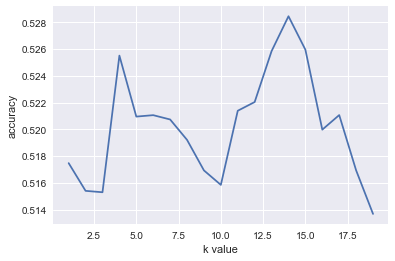

In [289]:
# search for an optimal value of K
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [290]:
# what is the optimal k value?
print scores

[0.51747477129114405, 0.51540507403565028, 0.51530062246534003, 0.52550363104781672, 0.52094949542582281, 0.52105606903706492, 0.5207344619447325, 0.51921225124964621, 0.51693129303027452, 0.51585070263133082, 0.5213859285107989, 0.52203715929453931, 0.52583702725643688, 0.52844195039139863, 0.52594312930302745, 0.51997524285579555, 0.52106384985381493, 0.51693624445911535, 0.51368315571064804]


In [291]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.500542495479
[[1035  328]
 [1053  349]]
             precision    recall  f1-score   support

          0       0.50      0.76      0.60      1363
          1       0.52      0.25      0.34      1402

avg / total       0.51      0.50      0.47      2765

0.504142232614


# Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.99793836805555558

In [293]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [294]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))
print metrics.roc_auc_score(y, clf.predict(X))

0.877495659722
[[4140  468]
 [ 661 3947]]
             precision    recall  f1-score   support

          0       0.86      0.90      0.88      4608
          1       0.89      0.86      0.87      4608

avg / total       0.88      0.88      0.88      9216

0.877495659722


In [295]:
# generate evaluation metrics
print metrics.accuracy_score(y_train, clf.predict(X_train))
print metrics.confusion_matrix(y_train, clf.predict(X_train))
print metrics.classification_report(y_train, clf.predict(X_train))
print metrics.roc_auc_score(y_train, clf.predict(X_train))

0.999689970547
[[3244    1]
 [   1 3205]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3245
          1       1.00      1.00      1.00      3206

avg / total       1.00      1.00      1.00      6451

0.999689959216


In [296]:
print metrics.accuracy_score(y_test, clf.predict(X_test))
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))
print metrics.roc_auc_score(y_test, clf.predict(X_test))

0.592405063291
[[896 467]
 [660 742]]
             precision    recall  f1-score   support

          0       0.58      0.66      0.61      1363
          1       0.61      0.53      0.57      1402

avg / total       0.60      0.59      0.59      2765

0.593308689086


# Feature Selection

In [297]:
X.head(3)

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,SPORT,PCTMARR,...,OWNHOME_1,OWNHOME_,COMP_1,COMP_,BACKER_0,BACKER_1,SPORT_0.0,SPORT_1.0,SPORT_2.0,SPORT_3.0
0,0,0,1,1,1,15,8,1,0.0,77,...,1,0,0,1,0,1,1,0,0,0
1,0,0,1,0,1,15,3,1,0.0,53,...,0,0,1,0,0,1,1,0,0,0
2,1,0,0,0,1,15,11,1,0.0,50,...,1,0,0,1,0,1,1,0,0,0


In [298]:
# SelectBest (k =5)
X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
print X_new

[[   8.    1.  203.    0.    1.]
 [   3.    1.   68.    0.    1.]
 [  11.    1.   38.    0.    1.]
 ..., 
 [   6.    0.   95.    1.    0.]
 [   7.    1.   37.    0.    1.]
 [   7.    1.  344.    0.    1.]]


In [299]:
selector = SelectKBest(chi2, k=5).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[ 6  7 10 31 32]


In [302]:
X_nex = df[['YEARS', 'BACKER', 'HOMEVAL', 'BACKER_0', 'BACKER_1']]
print X_nex.head()

   YEARS  BACKER  HOMEVAL  BACKER_0  BACKER_1
0      8       1      203         0         1
1      3       1       68         0         1
2     11       1       38         0         1
3      4       0       68         1         0
4      5       0      194         1         0


In [303]:
# build decision tree model with two predictors (X_new)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier( max_depth=3,min_samples_leaf=5)
dt.fit(X_train, y_train)

# Find out the performance of this model & interpret the results
# just get accuracy_score and confusion_matrix
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test))

0.594213381555
--------------------------------------------------------
[[1102  261]
 [ 861  541]]
